# K-Anonymity 
<p align="justify">$\qquad$ <b>k-anonymity</b> -модель, которая позволяет снижать риски повторной идентификации путем объединения атрибутов в группы, описывающие не менее $k$ людей. Предположим, что имеется набор из  $N$ строк/записей. Каждая запись состоит из  $D$ полей/атрибутов, из которых $X_i$ ($i \in [0,D]$) не содержат конфиденциальной информации (non-sensitive) о физическом лице, примером таких атрибутов является возраст, пол, почтовый код и т.п. Однако,  это подмножество атрибутов может в совокупности указывать на конкретное лицо в данной группе.Такие атрибуты, в совокупности указывающие на конкретную персону называются <b>квази-идентификаторами</b> ("quasi-identifiers"), а их комбинация - <b>супер-идентификатор</b> ("super-identifier"), который может указывать на уникальную персону в достаточно большом наборе данных (т.е. комбинация пола, возраста и почтового кода ведет к выделению отдельной личности). </p>


In [7]:
import pandas as pd
from collections import Counter

df = pd.read_excel("marketing_case_v.0.7.xlsx", sheet_name="B1", engine = 'openpyxl')
df.tail(10)


,Микросегмент,Дата просмотра рекламы,Кол-во просмотров рекламы,Кол-во уникальных пользователей
499990,91611244xx,2020-02-24,21,12
499991,91611504xx,2020-08-05,29,10
499992,91611336xx,2020-08-31,5,19
499993,91611919xx,2020-08-05,9,22
499994,91611566xx,2020-08-03,29,23
499995,91611578xx,2020-12-04,1,17
499996,91611363xx,2020-03-23,3,23
499997,91611613xx,2020-10-22,12,6
499998,91611223xx,2020-04-20,19,15
499999,91611505xx,2020-12-06,10,27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Микросегмент                     500000 non-null  object
 1   Дата просмотра рекламы           500000 non-null  object
 2   Кол-во просмотров рекламы        500000 non-null  int64 
 3   Кол-во уникальных пользователей  500000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 15.3+ MB


Currently each row is unique

In [9]:
'Duplicates == ' + str(df.shape[0] - df.drop_duplicates().shape[0])

'Duplicates == 429'

#### Модель $k$-anonimity и риски повторной идентификации

<p align="justify">$\qquad$ В дополнение подразумевается, что кроме квази-идентификаторов набор данных может содержать некоторые данные напрямую указывающие на личность (например, ИНН) - <b>прямые идентификаторы</b> ("direct-identificatotrs"), а также по крайней мере один атрибут представляющий чувствительную информацию - например, уровень дохода ("income") или сведения о болезни. Модель нацелена на защиту этой чувствительной информации. В рамках такой защиты записи подвергаются методам обезличивания - <b>обобщению</b> ("generalization") или подавлению ("suppression"), цель этих методов разрушить информацию таким образом, чтобы снизить количество строк с одинаковыми квази-атрибутами (так называемые классы эквивалентности). Объем минимального класса эквивалентности (количество записей с одинаковыми занчениями квази-идентификаторов) обратно пропорционален вероятности риска повторной идентификации и может служить числовой характеристикой метода.</p>


<p align="justify">$\qquad$ Применение методов обезличивания ведет к тому, что полезная информация в обезличенных наборах данных становится менеее качественной - для измерения уровня этого качества используются специальные метрики <b>расчета полезности</b> ("utility"). Суть модели - нахождение баланса между риском повторной идентификации с одной стороны и полезностью набора  данных - с другой.</p>

<p align="justify">$\qquad$ В первом приближении модель k-anonymity  требует выделения квази-идентификаторов ("QID") и вычисления для них <b>размеров классов-эквивалентности</b>  $k$ строк/физических лиц, затем итерационное применение методов обезличивания (включающих подавление строк или ячеек, обобщение значений), между которыми следует анализ получившегося набора и уточнение параметров методов обезличивания. В результате это защищает отдельных людей, сводя к минимому информацию об отдельном человеке, оставляя злоумышленнику ("adversary") только информацию о принадлежности данного человека к определенной группе.  Хотя получающийся набор не является точным, он все еще годится для целей анализа и построения моделей машинного обучения. В ряде случаев надо решать не только проблему обезличивания, но и иного подхода к идентификации, например, для решения задач, в которых обобщенные данные не могут использоваться напрямую.</p>


In [10]:
QI=[ 'Микросегмент',
    'Дата просмотра рекламы',]

In [11]:
def k_anonymous(data, columns):
  ## Возьмите фрейм данных, верните значение k-anonymity
  ## Агрегируйте по именам столбцов и возьмите ненулевой минимум каждой строки
  aggregrate = data.groupby(columns).count().apply(lambda x : set(x) - set({0}),axis = 1)
  aggregrate = aggregrate.apply(lambda x : 0 if x == set() else min(x))
  return min(aggregrate)
print(' k-anonymity = ' + str(k_anonymous(df, QI)))

 k-anonymity = 1


In [12]:
for arg in QI:
    print(f"-----------------------------{arg}----------------------------")
    print(Counter(df[arg]))

-----------------------------Микросегмент----------------------------
Counter({'91611471xx': 675, '91611221xx': 659, '91611047xx': 657, '91611588xx': 655, '91611322xx': 655, '91611404xx': 654, '91611465xx': 653, '91611137xx': 652, '91611208xx': 650, '91611206xx': 644, '91611520xx': 641, '91611237xx': 641, '91611400xx': 639, '91611043xx': 639, '91611240xx': 638, '91611557xx': 637, '91611551xx': 637, '91611354xx': 637, '91611489xx': 637, '91611417xx': 636, '91611448xx': 636, '91611573xx': 636, '91611277xx': 636, '91611593xx': 635, '91611275xx': 635, '91611130xx': 635, '91611091xx': 634, '91611345xx': 634, '91611142xx': 634, '91611190xx': 633, '91611187xx': 633, '91611546xx': 633, '91611319xx': 633, '91611146xx': 633, '91611311xx': 632, '91611289xx': 632, '91611094xx': 632, '91611541xx': 631, '91611339xx': 630, '91611407xx': 630, '91611250xx': 630, '91611496xx': 630, '91611223xx': 630, '91611256xx': 629, '91611469xx': 629, '91611076xx': 628, '91611126xx': 627, '91611077xx': 627, '91611441

#### Графики подсчета этих типов данных показаны ниже.

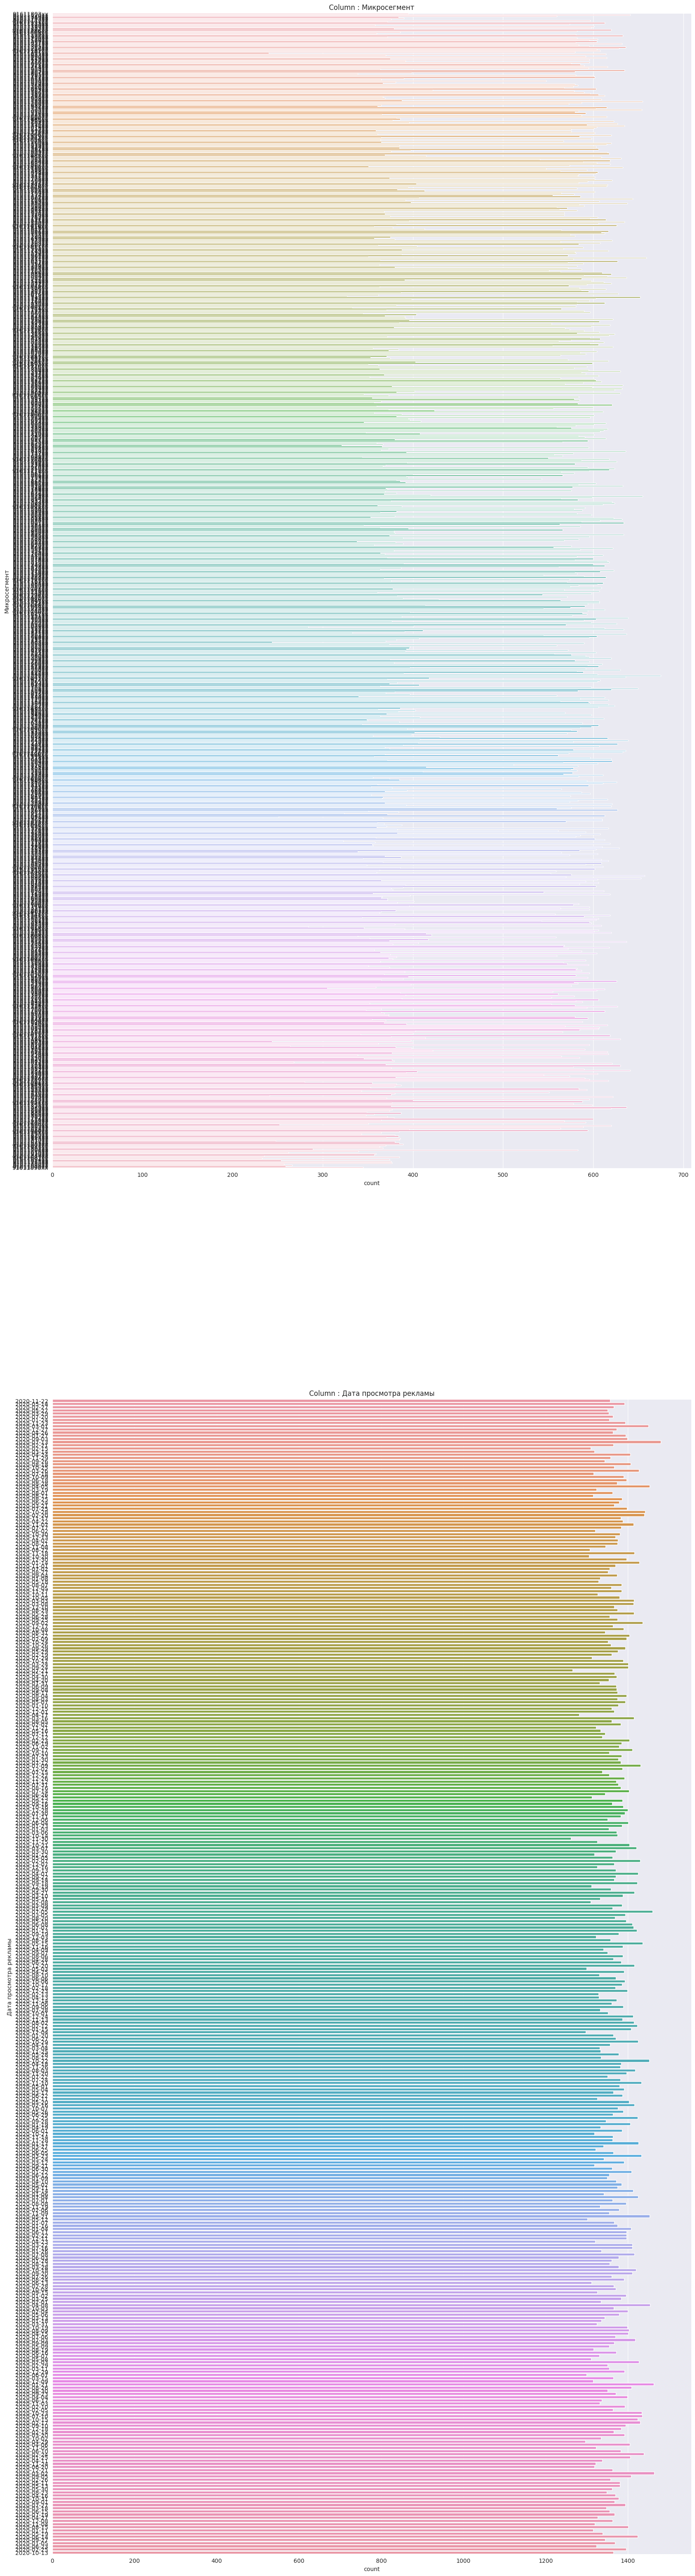

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = QI

fig, ax = plt.subplots(len(columns), figsize = (20,80))
for i in range(len(columns)):
  ax[i].set_title('Column : ' + str(columns[i]))
  sns.countplot(y = columns[i], data = df, ax = ax[i])